In [1]:
#imports 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
#Load the data
path = "./outputs/metropolis_phi_phi/2024-08-13/16-15-52/all.json"
with open(path, "r") as file:
    data_mh = json.load(file)
path = "./outputs/is_phi_phi/2024-08-13/17-15-23/all.json"
with open(path, "r") as file:
    data_is = json.load(file)


In [3]:
#For fair comparison it is better to compare with the same true rule
assert data_mh["true_rule"] == data_is["true_rule"]
print(len(data_mh["rules"]), len(data_is["rules"]))

603 575


In [4]:
#Extract data
true_rule = data_mh["true_rule"]

all_rules_mh, all_rules_is = data_mh["rules"], data_is["rules"]
all_likelihoods_mh, all_likelihoods_is = np.array(data_mh["likelihoods"]),np.array(data_is["likelihoods"])
metrics_mh, metrics_is = data_mh["metrics"], data_is["metrics"]

all_weights_mh = metrics_mh["weights"]
all_prev_rules_ind_mh = np.array(metrics_mh["prev_rules_ind"])
nb_particles_mh = metrics_mh["nb_particles"]


counts_is = np.array(metrics_is["counts"])

# Print rules

In [5]:
print("Metropolis Hastings")
indices = np.argsort(-np.array(all_likelihoods_mh))
print("------------------------")
print("true rule: " + repr(true_rule))
print("------------------------")
for ind in indices:
    print(
        f"-----rule-----:{ind%nb_particles_mh}-{ind//nb_particles_mh}({all_prev_rules_ind_mh[ind]}):   {repr(all_rules_mh[ind])}, likelihood: {all_likelihoods_mh[ind]:2f}, weight: {all_weights_mh[ind]:2f}"
    )

Metropolis Hastings
------------------------
true rule: 'opens with medium ball.'
------------------------
-----rule-----:0-99(73):   'The door will open when you are holding a medium-colored ball.', likelihood: -0.573850, weight: 0.024204
-----rule-----:0-130(99):   'The door will open when you are holding a medium-colored ball.', likelihood: -0.573850, weight: -0.047673
-----rule-----:0-65(64):   'The door will open when you are holding a medium-colored ball.', likelihood: -0.573850, weight: -0.000397
-----rule-----:0-66(65):   'The door will open when you are holding a medium-colored ball.', likelihood: -0.573850, weight: 0.004040
-----rule-----:0-73(66):   'The door will open when you are holding a medium-colored ball.', likelihood: -0.573850, weight: 0.000775
-----rule-----:0-149(131):   'The door will open when you are holding a medium-colored ball.', likelihood: -0.573850, weight: -0.030870
-----rule-----:0-64(58):   'The door will open when you are holding a medium-colored ball

In [6]:
print("Importance Sampling")
indices = np.argsort(-np.array(all_likelihoods_is))
print("------------------------")
print("true rule: " + repr(true_rule))
print("------------------------")
for ind in indices:
    print(
        f"-----rule-----:{ind}:   {repr(all_rules_is[ind])}, likelihood: {all_likelihoods_is[ind]:2f}, count: {counts_is[ind]}"
    )

Importance Sampling
------------------------
true rule: 'opens with medium ball.'
------------------------
-----rule-----:303:   'The door opens when a medium color ball of any size is held.', likelihood: -0.680553, count: 1
-----rule-----:340:   'The rule for opening the door is holding a medium red or green ball.', likelihood: -0.702407, count: 1
-----rule-----:225:   'The rule is that the door can only be opened by holding a medium-s05fenced ball of any color.', likelihood: -0.855126, count: 1
-----rule-----:427:   'The rule for the door is that it is closed when a key, regardless of size and color, is being held and opened when a medium ball, regardless of color, is being held.', likelihood: -1.196884, count: 1
-----rule-----:414:   'Rule: Hold a medium-s0led colored ball to unlock the door.', likelihood: -1.234702, count: 1
-----rule-----:410:   'To open the door, hold a medium green ball or a medium red ball.', likelihood: -1.294619, count: 1
-----rule-----:342:   'The rule for o

# Comparison

In [7]:
# restaure the counts for is for futur use
all_rules_is = np.repeat(all_rules_is, counts_is, axis=0)
all_likelihoods_is = np.repeat(all_likelihoods_is, counts_is, axis=0)

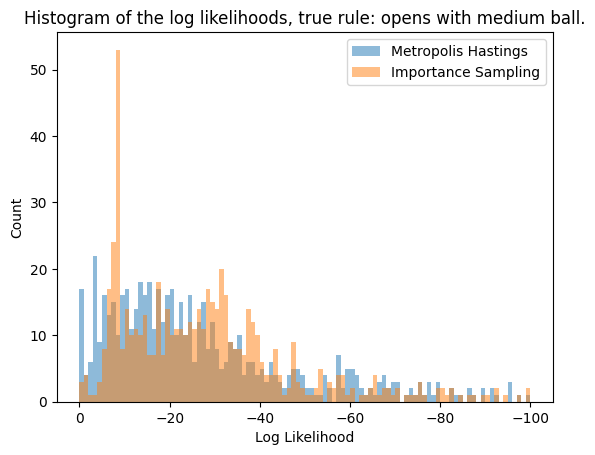

In [10]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh, range=(-100,0), bins=100, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is, range=(-100,0), bins=100, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods, true rule: {true_rule}")
plt.show()


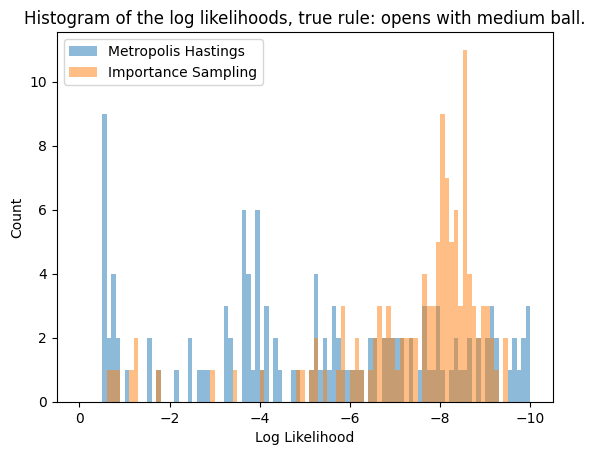

In [11]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh, range=(-10,0), bins=100, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is, range=(-10,0), bins=100, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods, true rule: {true_rule}")
plt.show()



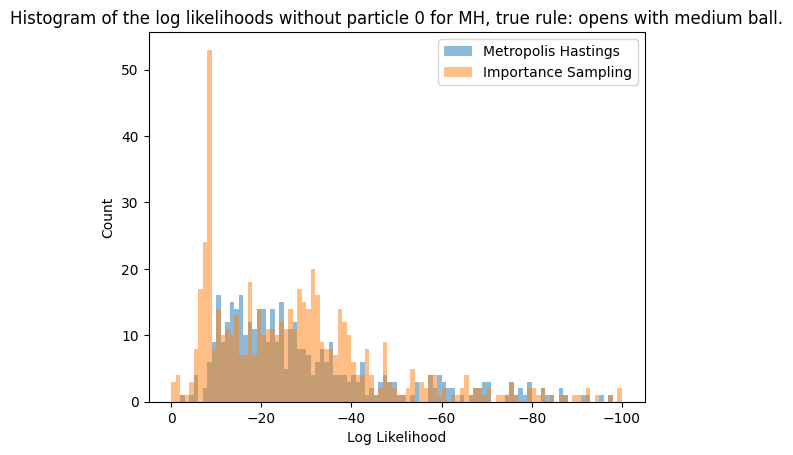

In [12]:
# Histogram of the likelihoods
indices = np.where(np.arange(len(all_likelihoods_mh)) % nb_particles_mh != 0)
plt.figure()
plt.hist(all_likelihoods_mh[indices], range=(-100,0), bins=100, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is, range=(-100,0), bins=100, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods without particle 0 for MH, true rule: {true_rule}")
plt.show()


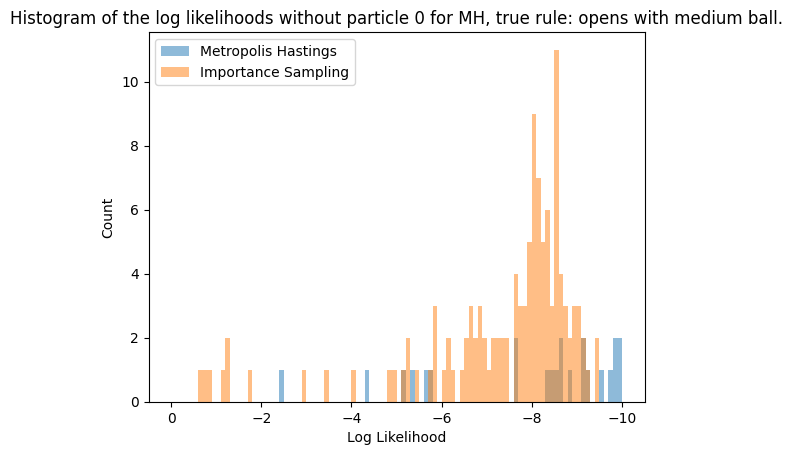

In [13]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh[indices], range=(-10,0), bins=100, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is, range=(-10,0), bins=100, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods without particle 0 for MH, true rule: {true_rule}")
plt.show()


# Individual Analysis

## Metropolis Hasting analysis


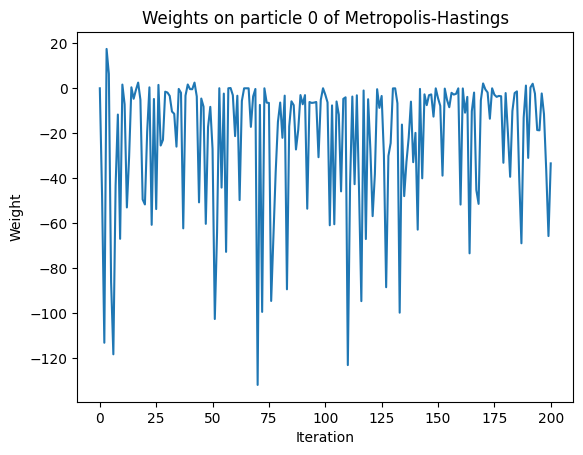

In [14]:
#Plot the weights
plt.figure()
plt.plot([all_weights_mh[i*nb_particles_mh] for i in range(len(all_weights_mh)//nb_particles_mh)])
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.title("Weights on particle 0 of Metropolis-Hastings")
plt.show()


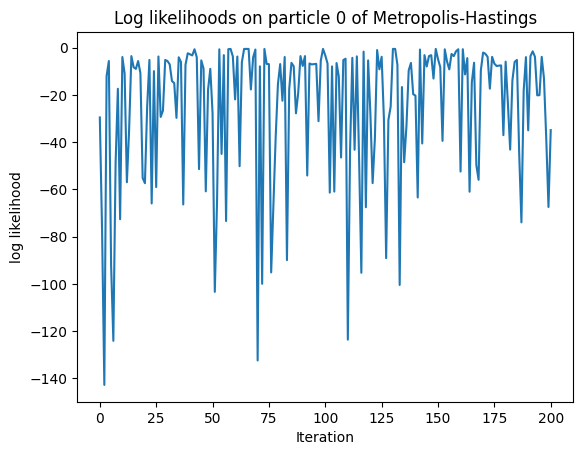

In [16]:
#Plot the likelihoods
plt.figure()
plt.plot([all_likelihoods_mh[i*nb_particles_mh] for i in range(len(all_likelihoods_mh)//nb_particles_mh)])
plt.xlabel("Iteration")
plt.ylabel("log likelihood")
plt.title("Log likelihoods on particle 0 of Metropolis-Hastings")
plt.show()


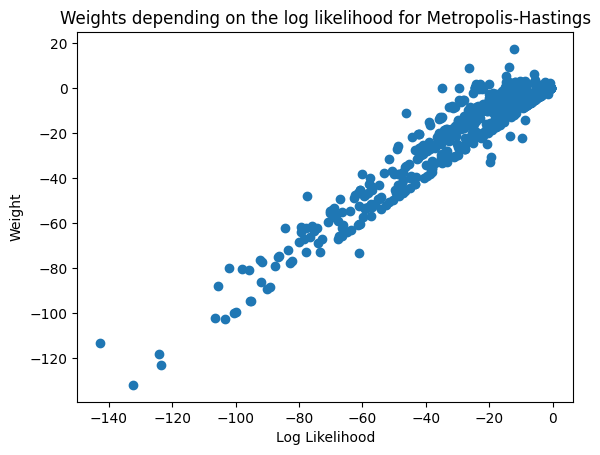

In [17]:
# Evolution of the weights depending on the likelihood
plt.figure()
plt.scatter(all_likelihoods_mh, all_weights_mh)
plt.xlabel("Log Likelihood")
plt.ylabel("Weight")
plt.title("Weights depending on the log likelihood for Metropolis-Hastings")
plt.show()


Text(0.5, 1.0, 'Weights depending on the log likelihood difference')

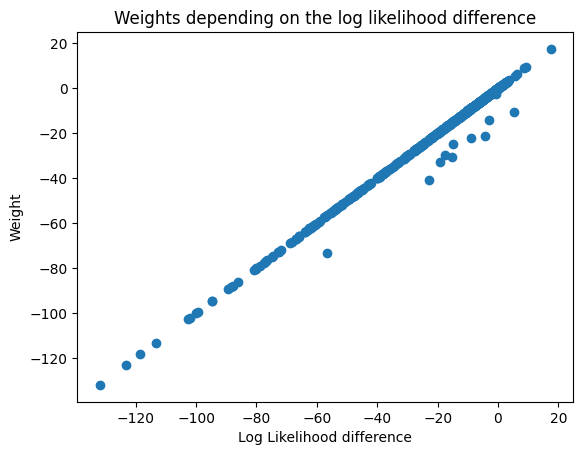

In [18]:
#Compute difference between rule and previous rule
# Find the position of the gloabl array given the branch and branch index

prev_indices = all_prev_rules_ind_mh[3:] * nb_particles_mh + np.tile(np.arange(nb_particles_mh),(len(all_weights_mh)//nb_particles_mh) -1)
all_likelihoods_mh[3:] - all_likelihoods_mh[prev_indices]
plt.figure()
plt.scatter(all_likelihoods_mh[3:]- all_likelihoods_mh[prev_indices], all_weights_mh[3:])
plt.xlabel("Log Likelihood difference")
plt.ylabel("Weight")
plt.title("Weights depending on the log likelihood difference")

# Embeddings

In [23]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

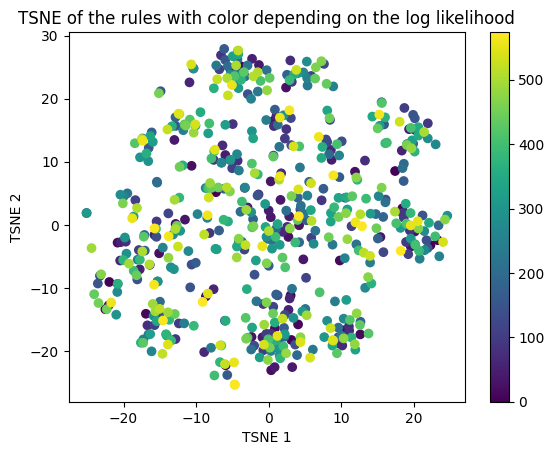

In [28]:
model = SentenceTransformer("all-mpnet-base-v2")
embeddings = model.encode(all_rules_is)
proj_embeddings = TSNE(n_components=2).fit_transform(embeddings)
# Plot the embeddings
plt.figure()
plt.scatter(proj_embeddings[:,0], proj_embeddings[:,1], c=np.arange(len(all_rules_is)))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules with color depending on when they were sampled")
plt.show()

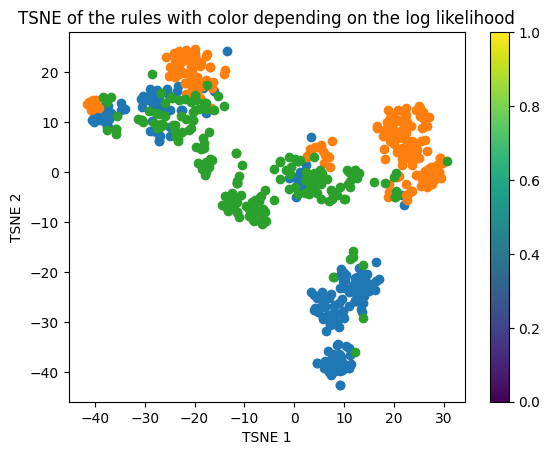

In [35]:
model = SentenceTransformer("all-mpnet-base-v2")
embeddings = model.encode(all_rules_mh)
proj_embeddings = TSNE(n_components=2).fit_transform(embeddings)
indices = [np.arange(len(all_rules_mh), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
# Plot the embeddings
plt.figure()
plt.scatter(proj_embeddings[indices[0],0], proj_embeddings[indices[0],1])
plt.scatter(proj_embeddings[indices[1],0], proj_embeddings[indices[1],1])
plt.scatter(proj_embeddings[indices[2],0], proj_embeddings[indices[2],1])
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules depending on the generation")
plt.show()

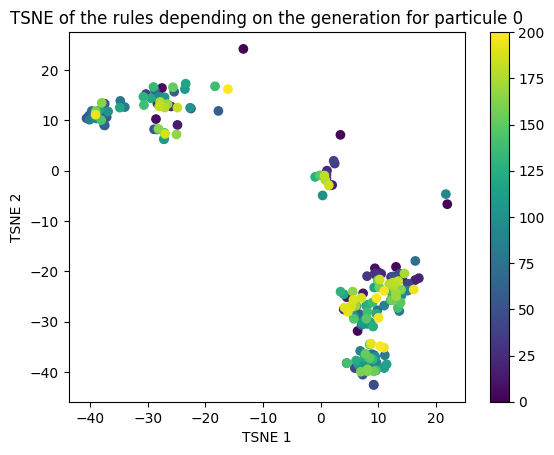

In [36]:
plt.figure()
plt.scatter(proj_embeddings[indices[0],0], proj_embeddings[indices[0],1], c=np.arange(len(indices[0])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules depending on the generation for particule 0")
plt.show()

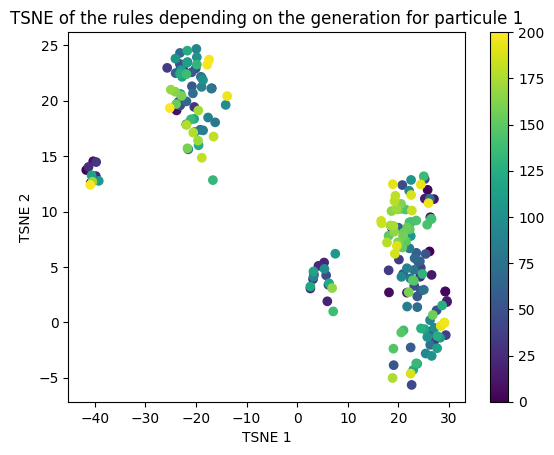

In [37]:
plt.figure()
plt.scatter(proj_embeddings[indices[1],0], proj_embeddings[indices[1],1], c=np.arange(len(indices[1])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules depending on the generation for particule 1")
plt.show()

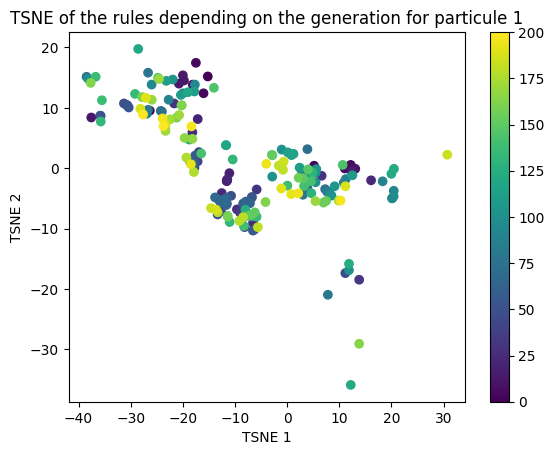

In [38]:
plt.figure()
plt.scatter(proj_embeddings[indices[2],0], proj_embeddings[indices[2],1], c=np.arange(len(indices[2])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules depending on the generation for particule 1")
plt.show()